In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from wordcloud import WordCloud
import plotly.express as px
import joblib
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import calendar
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt


Data Preprocessing and cleaning


Reading and merging datasets


In [3]:
df1=pd.read_csv(r"c:\Users\admin\Downloads\ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [4]:
import pandas as pd
df2=pd.read_csv(r"c:\Users\admin\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012 (2).csv")
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [5]:
df3=pd.read_csv(r"c:\Users\admin\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")
df3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [6]:
df4=pd.read_csv(r"C:\Users\admin\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [7]:
df5=pd.read_csv(r"c:\Users\admin\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")
df5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
177906,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,62 years 08 months,855000.0
177907,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 10 months,900000.0
177908,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,62 years 10 months,805000.0
177909,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,62 years 11 months,998000.0


In [8]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])


0         61
1         60
2         62
3         62
4         62
          ..
177906    62
177907    62
177908    62
177909    62
177910    62
Name: remaining_lease, Length: 177911, dtype: int64


In [9]:
# Merging datasets df1, df2, df3, df4 and df5
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


Feature engineering


In [10]:
# Split 'month' into 'year' and 'month' columns
df_combined[['year', 'month']] = df_combined['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
df_combined['year'] = pd.to_numeric(df_combined['year'])
df_combined['month'] = pd.to_numeric(df_combined['month'])


3 datasts do not having the 'remaining_lease' and thus when we merged all 5 datasetstogether we have Nan values on those rows. We use the below formula to obtain the values for those Nan values.

remaining lease = 99-(Year-lease commence date)

In [11]:
# Calculate remaining lease for rows with NaN values
df_combined['remaining_lease'].fillna(99 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_20908\2760399119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['remaining_lease'].fillna(99 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)


In [12]:
# Changing the case to uppercase for consistency
df_combined['flat_model'] = df_combined['flat_model'].str.upper()


In [13]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,62.0,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,62.0,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,62.0,2024
924112,2,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,62.0,2024


In [14]:
# Convert 'flat_type' values to lowercase
df_combined['flat_type'] = df_combined['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

df_combined['flat_type'] = df_combined['flat_type'].map(type_mapping)

# Changing the case to Uppercase
df_combined['flat_type'] = df_combined['flat_type'].str.upper()


In [15]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,62.0,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,62.0,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,62.0,2024
924112,2,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,62.0,2024


 checking for outliers in the columns 'remaining lease' and 'storey range'. We found out that a few rows have a remaining lease more than 99 years which is not systematically possible and some values in storey range have a 5 incremental floor ranges, since these constitute very little to the dataset, we remove these outliers.


In [16]:
# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['remaining_lease']>99

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]


In [17]:
# Drop rows where the 'storey_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['storey_range'].isin(values_to_drop)

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]


In [18]:
# Split the 'storey_range' into lower and upper bounds
df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df_combined['lower_bound'] = pd.to_numeric(df_combined['lower_bound'])
df_combined['upper_bound'] = pd.to_numeric(df_combined['upper_bound'])


In [19]:
# Adding a new column 'price_per_sqm'
df_combined['price_per_sqm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']

# Adding a new column 'years_holding'
df_combined['years_holding'] = df_combined['year'] - df_combined['lease_commence_date']

# Adding a new column 'current_remaining_lease'
df_combined['current_remaining_lease'] = df_combined['remaining_lease'] - (2024 - df_combined['year'])


In [20]:
# Saving the clean dataset to a file
df_combined = df_combined.reset_index(drop=True)
df_combined.to_csv('Singapore_resale_flat_prices_updated.csv', index=False)

In [21]:
# Reading the dataset
df = pd.read_csv('Singapore_resale_flat_prices_updated.csv')

# Display basic information about the dataset
print(df.info())

# Display summary statistics of numerical columns
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917225 entries, 0 to 917224
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    917225 non-null  int64  
 1   town                     917225 non-null  object 
 2   flat_type                917225 non-null  object 
 3   block                    917225 non-null  object 
 4   street_name              917225 non-null  object 
 5   storey_range             917225 non-null  object 
 6   floor_area_sqm           917225 non-null  float64
 7   flat_model               917225 non-null  object 
 8   lease_commence_date      917225 non-null  int64  
 9   resale_price             917225 non-null  float64
 10  remaining_lease          917225 non-null  float64
 11  year                     917225 non-null  int64  
 12  lower_bound              917225 non-null  int64  
 13  upper_bound              917225 non-null  int64  
 14  pric

In [22]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'lower_bound', 'upper_bound',
       'price_per_sqm', 'years_holding', 'current_remaining_lease'],
      dtype='object')

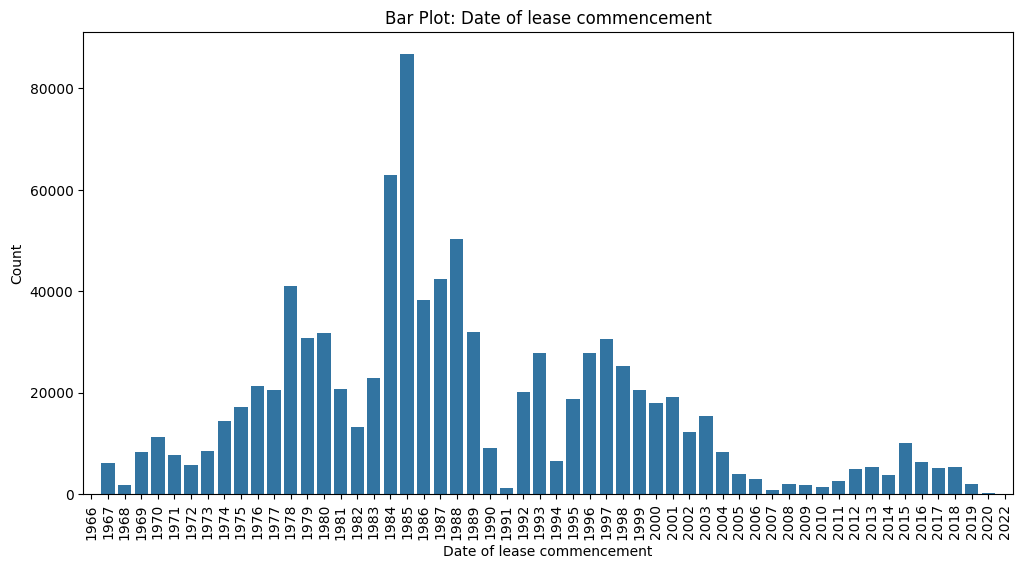

In [23]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


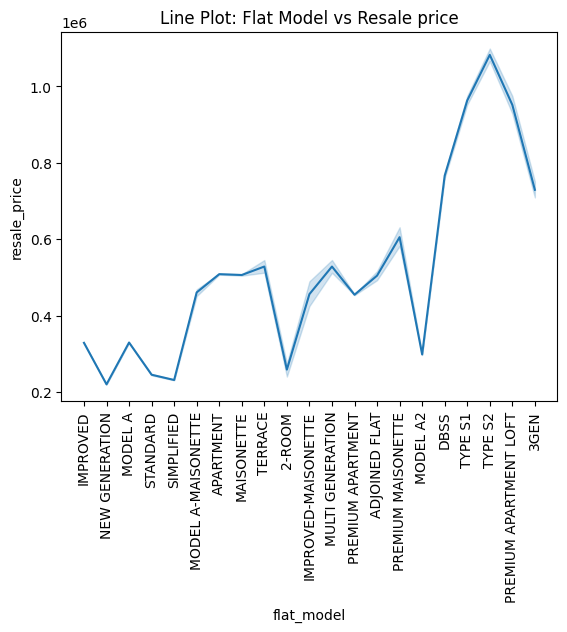

In [24]:
# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()


 In the above codes we explore the Bar plot and line plot of a few columns. In the below graph we find the highest floor sold for a particular year of lease commencement.


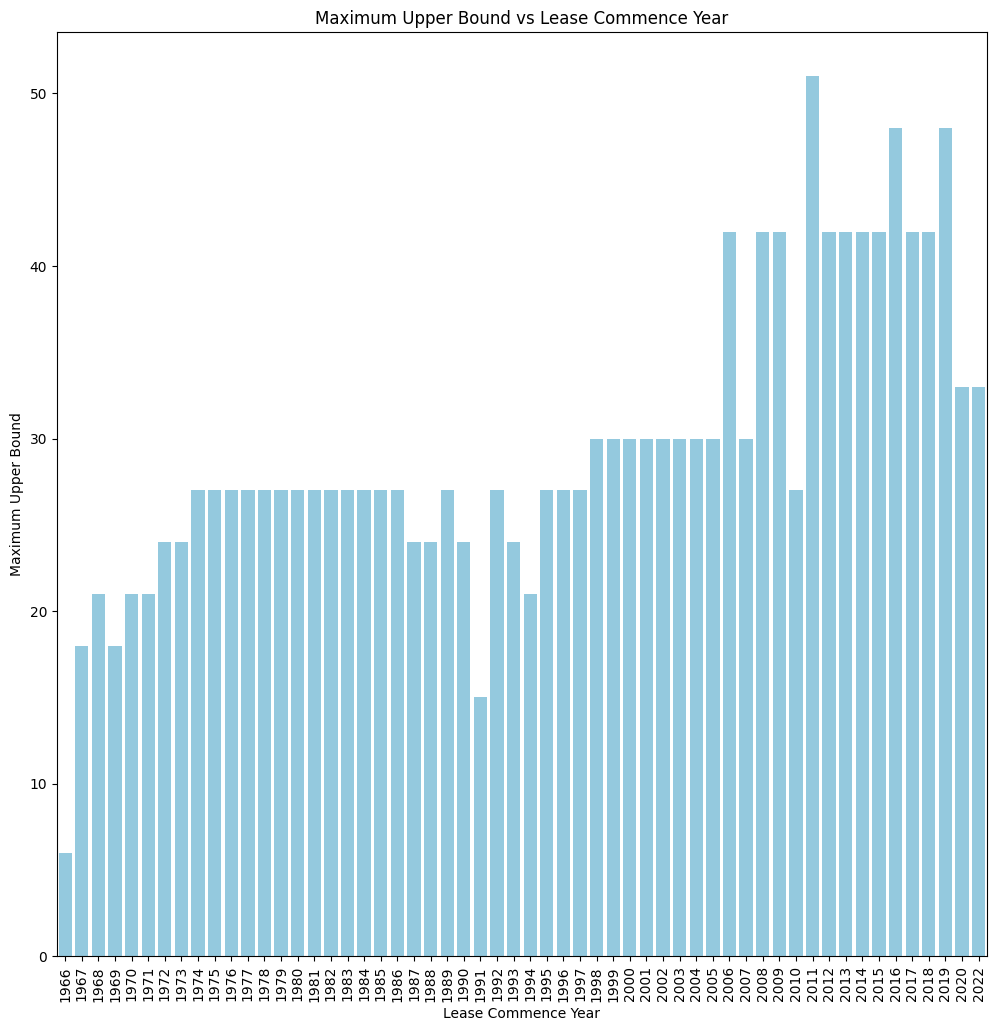

In [25]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='skyblue')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [26]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917220,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,62.0,2024,7,9,6021.126761,37,62.0
917221,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,62.0,2024,4,6,6164.383562,36,62.0
917222,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,62.0,2024,4,6,5669.014085,36,62.0
917223,2,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,62.0,2024,4,6,6085.365854,37,62.0


Converting Catogorical Features into Numerical

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to each categorical column
df['town'] = le.fit_transform(df['town'])
df['flat_type'] = le.fit_transform(df['flat_type'])
df['street_name'] = le.fit_transform(df['street_name'])
df['storey_range'] = le.fit_transform(df['storey_range'])
df['block'] = le.fit_transform(df['block'])


In [44]:
print(df['flat_model'].dtype)  # Check the data type of the feature
print(df['flat_model'].unique())  # View unique values


object
['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT'
 'ADJOINED FLAT' 'PREMIUM MAISONETTE' 'MODEL A2' 'DBSS' 'TYPE S1'
 'TYPE S2' 'PREMIUM APARTMENT LOFT' '3GEN']


In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'flat_model'
df['flat_model'] = label_encoder.fit_transform(df['flat_model'])


In [46]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease,flat_model\t
0,1,0,0,829,13,3,31.0,5,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,5
1,1,0,0,829,13,1,31.0,5,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,5
2,1,0,0,829,13,3,31.0,5,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,5
3,1,0,0,829,13,2,31.0,5,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,5
4,1,0,2,447,13,1,73.0,12,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917220,3,26,5,2366,575,2,142.0,3,1987,855000.0,62.0,2024,7,9,6021.126761,37,62.0,3
917221,4,26,5,2368,575,1,146.0,7,1988,900000.0,62.0,2024,4,6,6164.383562,36,62.0,7
917222,4,26,5,2383,575,1,142.0,3,1988,805000.0,62.0,2024,4,6,5669.014085,36,62.0,3
917223,2,26,6,1954,556,1,164.0,11,1987,998000.0,62.0,2024,4,6,6085.365854,37,62.0,11


Independent Features and Dependent Features

In [47]:
y = df['resale_price']   # Target variable
X = df.drop(columns=['resale_price']) ## dtaset
# Printing  the shapes to verify
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())




Features (X):
   month  town  flat_type  block  street_name  storey_range  floor_area_sqm  \
0      1     0          0    829           13             3            31.0   
1      1     0          0    829           13             1            31.0   
2      1     0          0    829           13             3            31.0   
3      1     0          0    829           13             2            31.0   
4      1     0          2    447           13             1            73.0   

   flat_model  lease_commence_date  remaining_lease  year  lower_bound  \
0           5                 1977             86.0  1990           10   
1           5                 1977             86.0  1990            4   
2           5                 1977             86.0  1990           10   
3           5                 1977             86.0  1990            7   
4          12                 1976             85.0  1990            4   

   upper_bound  price_per_sqm  years_holding  current_remaining_le

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (733780, 17) (733780,)
Testing set shape: (183445, 17) (183445,)


In [49]:
X

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease,flat_model\t
0,1,0,0,829,13,3,31.0,5,1977,86.0,1990,10,12,290.322581,13,52.0,5
1,1,0,0,829,13,1,31.0,5,1977,86.0,1990,4,6,193.548387,13,52.0,5
2,1,0,0,829,13,3,31.0,5,1977,86.0,1990,10,12,258.064516,13,52.0,5
3,1,0,0,829,13,2,31.0,5,1977,86.0,1990,7,9,193.548387,13,52.0,5
4,1,0,2,447,13,1,73.0,12,1976,85.0,1990,4,6,646.575342,14,51.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917220,3,26,5,2366,575,2,142.0,3,1987,62.0,2024,7,9,6021.126761,37,62.0,3
917221,4,26,5,2368,575,1,146.0,7,1988,62.0,2024,4,6,6164.383562,36,62.0,7
917222,4,26,5,2383,575,1,142.0,3,1988,62.0,2024,4,6,5669.014085,36,62.0,3
917223,2,26,6,1954,556,1,164.0,11,1987,62.0,2024,4,6,6085.365854,37,62.0,11


In [50]:
X['flat_model'].fillna('Unknown', inplace=True)  # Example: Fill missing values with 'Unknown'
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
X['flat_model'] = label_encoder.fit_transform(X['flat_model'])
X['flat_model'] = X['flat_model'].astype('int64')


# Verify the conversion
print(X['flat_model'].unique())


[ 5 12  8 17 16  9  3  7 18  0  6 11 13  2 15 10  4 19 20 14  1]


C:\Users\admin\AppData\Local\Temp\ipykernel_20908\980143674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['flat_model'].fillna('Unknown', inplace=True)  # Example: Fill missing values with 'Unknown'


Standardizing the dataset

In [51]:
print(X.dtypes)


month                        int64
town                         int32
flat_type                    int32
block                        int32
street_name                  int32
storey_range                 int32
floor_area_sqm             float64
flat_model                   int64
lease_commence_date          int64
remaining_lease            float64
year                         int64
lower_bound                  int64
upper_bound                  int64
price_per_sqm              float64
years_holding                int64
current_remaining_lease    float64
flat_model\t                 int32
dtype: object


In [52]:
X

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease,flat_model\t
0,1,0,0,829,13,3,31.0,5,1977,86.0,1990,10,12,290.322581,13,52.0,5
1,1,0,0,829,13,1,31.0,5,1977,86.0,1990,4,6,193.548387,13,52.0,5
2,1,0,0,829,13,3,31.0,5,1977,86.0,1990,10,12,258.064516,13,52.0,5
3,1,0,0,829,13,2,31.0,5,1977,86.0,1990,7,9,193.548387,13,52.0,5
4,1,0,2,447,13,1,73.0,12,1976,85.0,1990,4,6,646.575342,14,51.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917220,3,26,5,2366,575,2,142.0,3,1987,62.0,2024,7,9,6021.126761,37,62.0,3
917221,4,26,5,2368,575,1,146.0,7,1988,62.0,2024,4,6,6164.383562,36,62.0,7
917222,4,26,5,2383,575,1,142.0,3,1988,62.0,2024,4,6,5669.014085,36,62.0,3
917223,2,26,6,1954,556,1,164.0,11,1987,62.0,2024,4,6,6085.365854,37,62.0,11


In [53]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_train = scaler.fit_transform(X_train)

# Convert the standardized array back to a DataFrame for easier handling
X_test = scaler.transform(X_test)


Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the model
regression = LinearRegression()
regression.fit(X_train,y_train)

# Perform cross-validation
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Print the scores
print(mse)


[-1.22426781e+09 -1.22712840e+09 -1.20013794e+09 -1.21735749e+09
 -1.22632345e+09]


In [55]:
np.mean(mse)

-1219043015.7557814

Prediction

In [56]:
##prediction
reg_pred=regression.predict(X_test)
reg_pred

array([260890.01502348, 413542.01502348, 204069.01502348, ...,
       263970.01502348, 365710.01502348, 537360.01502348])

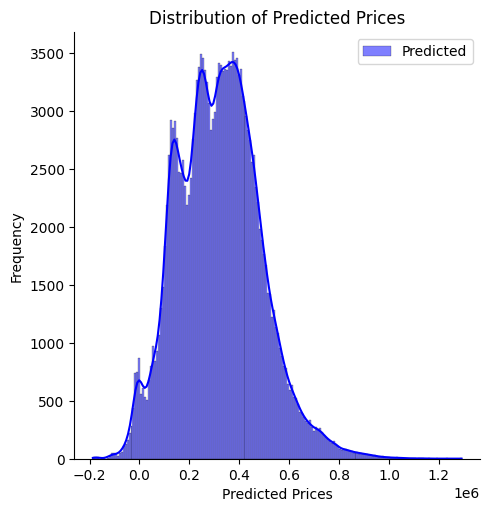

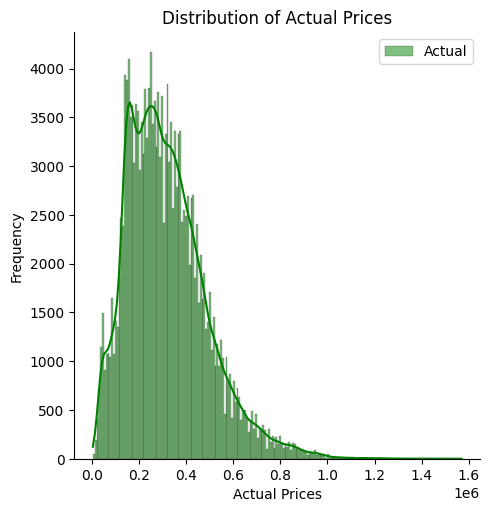

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming reg_pred and y_test are your predicted and actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': reg_pred})

# Plot the distribution of predicted values
sns.displot(results_df['Predicted'], kde=True, color='blue', label='Predicted')
plt.title('Distribution of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of actual values
sns.displot(results_df['Actual'], kde=True, color='green', label='Actual')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()


1. scatter plot

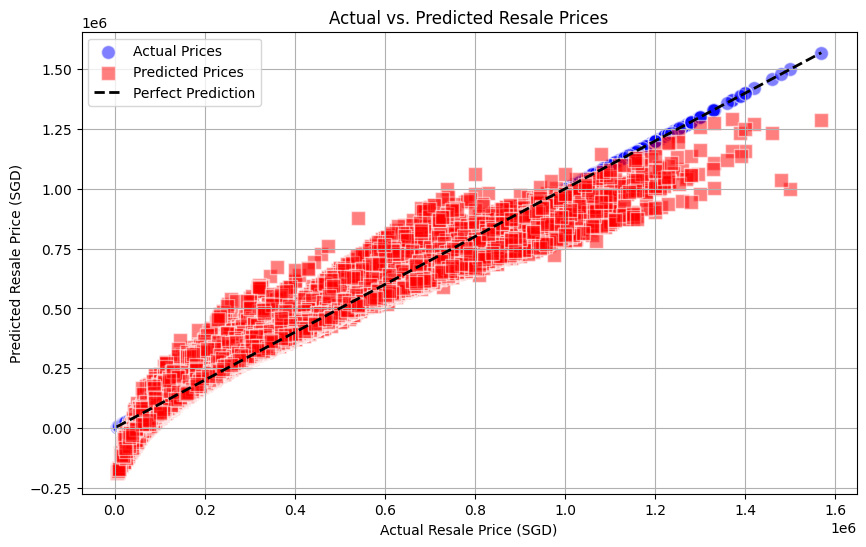

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot of actual prices (using circles)
plt.scatter(y_test, y_test, alpha=0.5, c='blue', edgecolors='w', s=100, label='Actual Prices')

# Scatter plot of predicted prices (using squares)
plt.scatter(y_test, reg_pred, alpha=0.5, c='red', edgecolors='w', s=100, marker='s', label='Predicted Prices')

# Line for perfect prediction (optional, for reference)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Resale Prices')
plt.xlabel('Actual Resale Price (SGD)')
plt.ylabel('Predicted Resale Price (SGD)')
plt.legend()
plt.grid(True)
plt.show()


3. Residual Plot


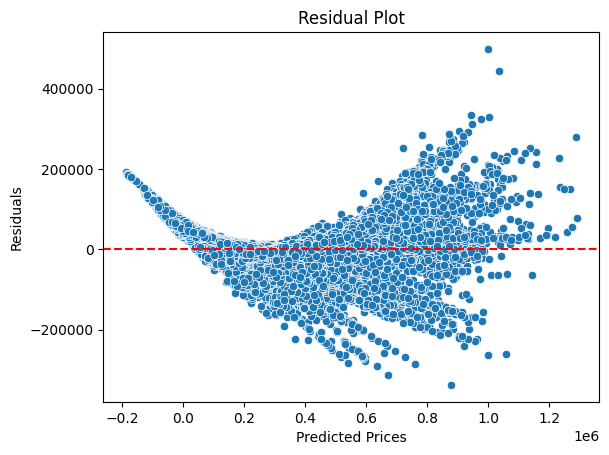

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
results_df['Residual'] = results_df['Actual'] - results_df['Predicted']

# Plot residuals
sns.scatterplot(x='Predicted', y='Residual', data=results_df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


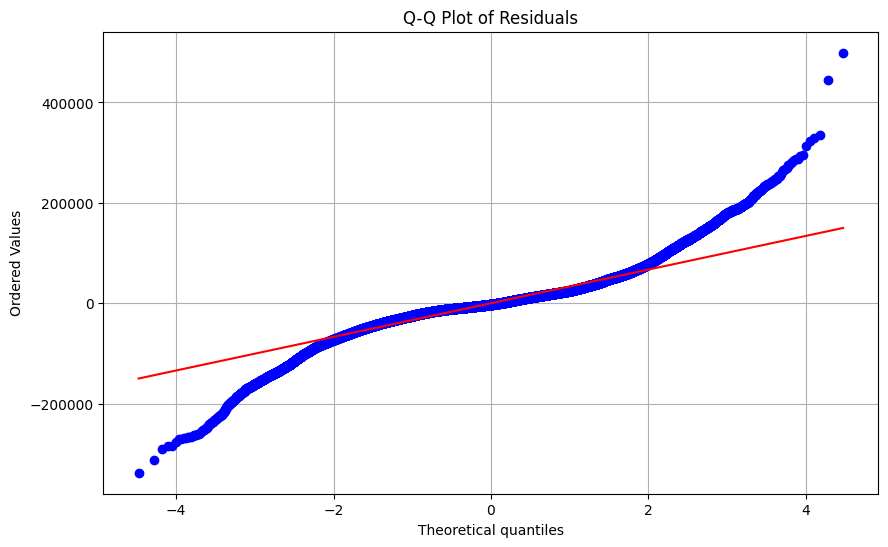

In [60]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = y_test - reg_pred


plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


Evaluation Metrics


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1218701775.8319561
Root Mean Squared Error: 34909.90942170942
Mean Absolute Error: 23584.654888781562
R-squared: 0.9577123399843495


Random Forest Regression

In [62]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1404609.416203339
Root Mean Squared Error: 1185.1621898302944
R-squared: 0.9999512615418923


Decision Tree Regresssion

In [63]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2599775.5878085657
Root Mean Squared Error: 1612.3819608915767
R-squared: 0.9999097905423998


Training the KNN Regression Model


In [64]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train, y_train)
# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 518274976.50708044
Root Mean Squared Error: 22765.653439053323
R-squared: 0.9820164075939012


the Random Forest model achieved the best performance in predicting Singapore resale flat prices based on the provided metrics.



It has the lowest MSE and RMSE and the highest 
𝑅
2 value, indicating the best predictive accuracy and fit among the models tested.

In [69]:
import joblib

# Assuming `model` is your trained Random Forest model
model_path = 'model/random_forest_model.pkl'

# Create the directory if it does not exist
import os
if not os.path.exists('model'):
    os.makedirs('model')

# Save the model to a file
joblib.dump(model, model_path)


['model/random_forest_model.pkl']

In [72]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917220,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,62.0,2024,7,9,6021.126761,37,62.0
917221,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,62.0,2024,4,6,6164.383562,36,62.0
917222,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,62.0,2024,4,6,5669.014085,36,62.0
917223,2,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,62.0,2024,4,6,6085.365854,37,62.0


In [73]:
unique_values = df_combined['flat_type'].unique()
print(unique_values)


['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
